In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from kohonen import *
from helpers import *
%load_ext autoreload
%autoreload 2
    
# load in data and labels    
data = np.array(np.loadtxt('data/data.txt'))
labels = np.loadtxt('data/labels.txt')

In [4]:
data_matrix = rewritedata(data)
visualize(data_matrix[i,:,:],labels[i])

NameError: name 'i' is not defined

In [2]:
#useful data
dim = 28*28
data_range = 255.0
    
# load in data and labels    
#data = np.array(np.loadtxt('data/data.txt'))
#labels = np.loadtxt('data/labels.txt')

# select 4 digits    
name = 'Andre Cibils' # REPLACE BY YOUR OWN NAME
targetdigits = name2digits(name) # assign the four digits that should be used
print(targetdigits) # output the digits that were selected
# this selects all data vectors that corresponds to one of the four digits
data = data[np.logical_or.reduce([labels==x for x in targetdigits]),:]
    
dy, dx = data.shape
    
#set the size of the Kohonen map. In this case it will be 6 X 6
size_k = 6
    
#set the width of the neighborhood via the width of the gaussian that
#describes it
sigma = 3.0

#set the learning rate
eta = 0.8 # HERE YOU HAVE TO SET YOUR OWN LEARNING RATE
    
#set the maximal iteration count
tmax = 2000 # this might or might not work; use your own convergence criterion

[0 5 7 9]


C:\Users\André\Documents\GitHub\NeuralNetwork_proj1\src\kohonen.py:144: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.sort(x[t,:])


Iteration number is 0 . Will iterate 0.8 time on the data set here.
(1,)


C:\Users\André\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


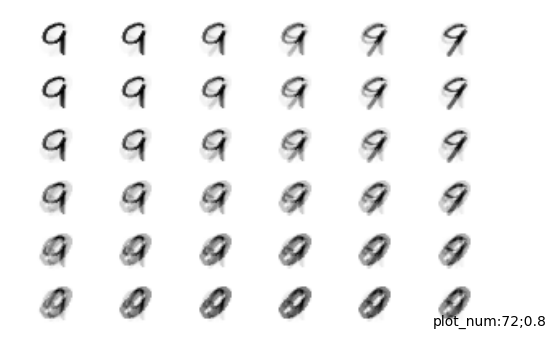

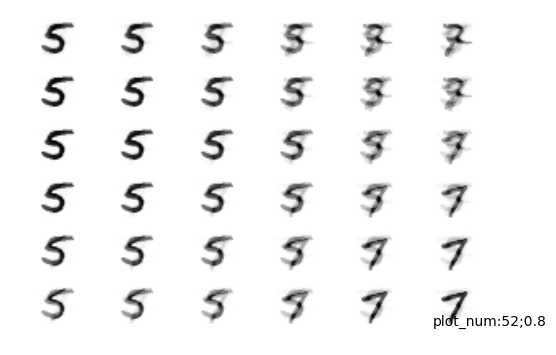

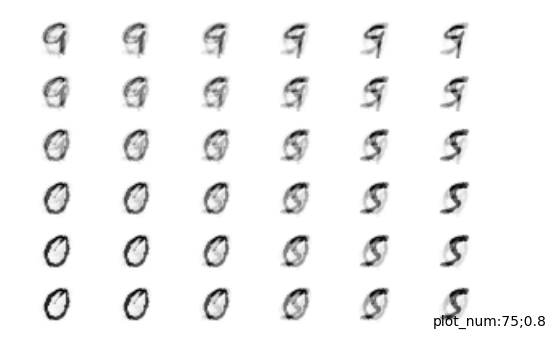

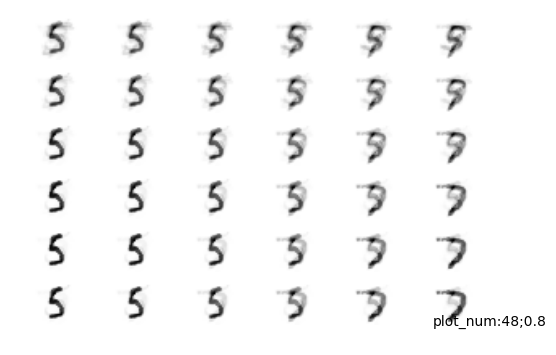

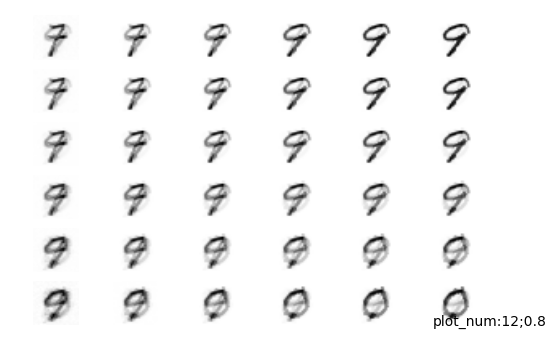

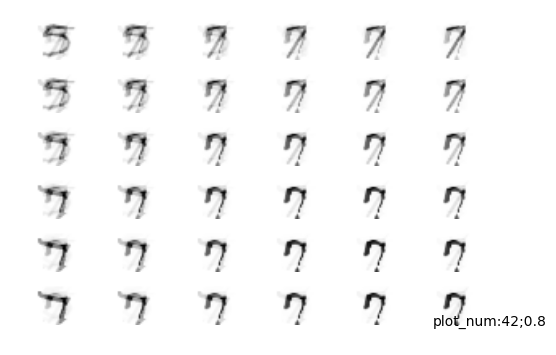

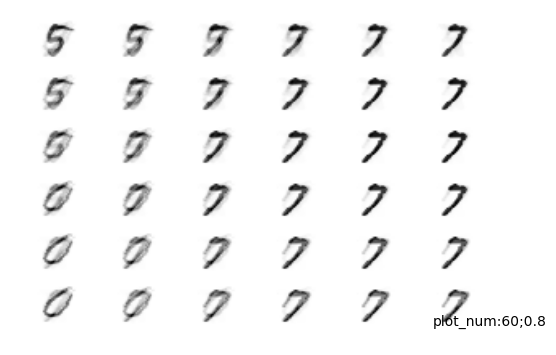

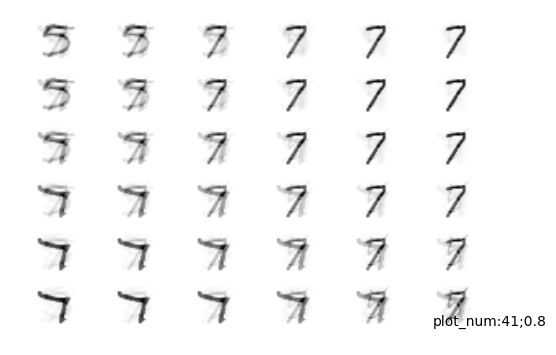

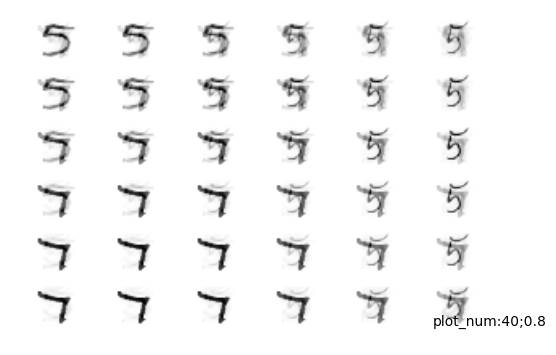

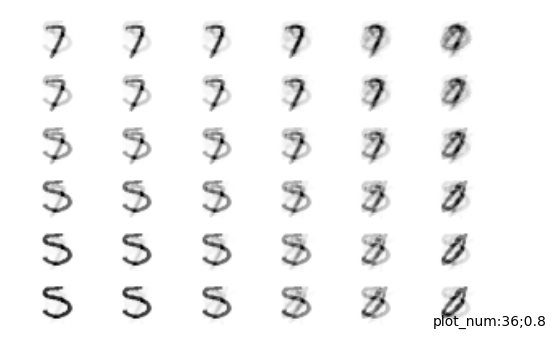

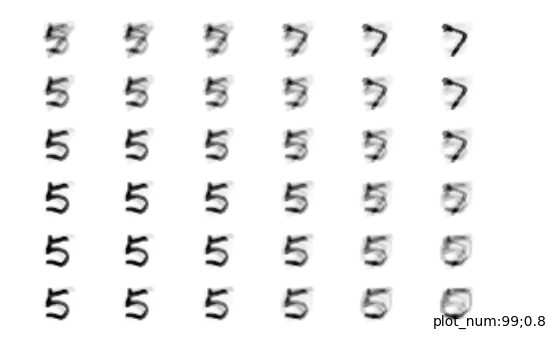

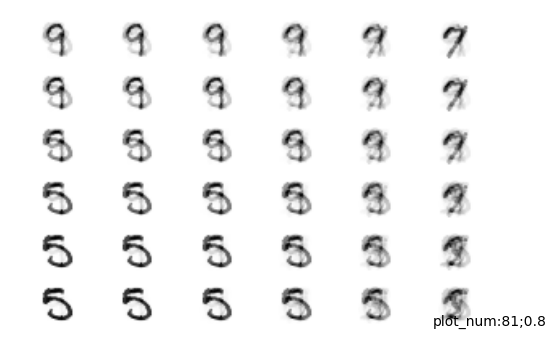

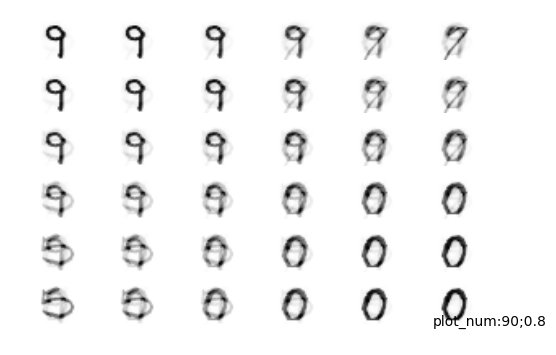

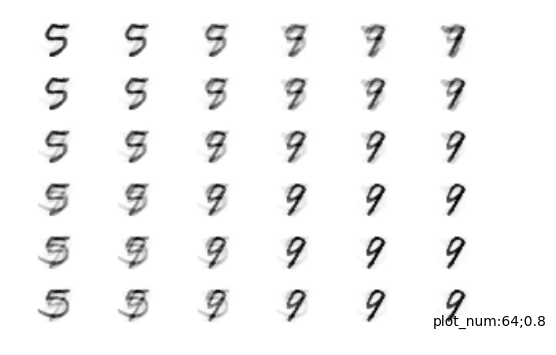

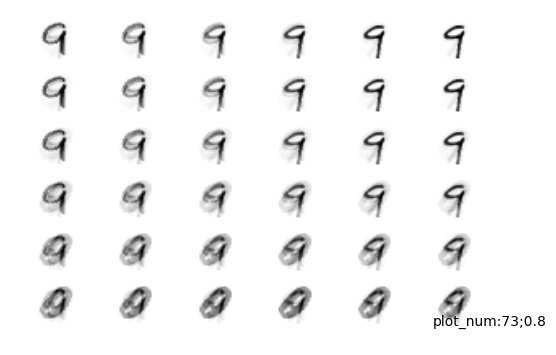

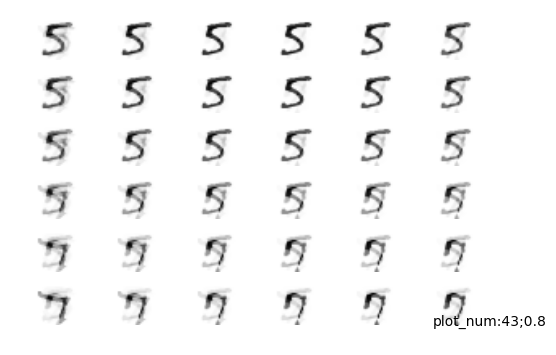

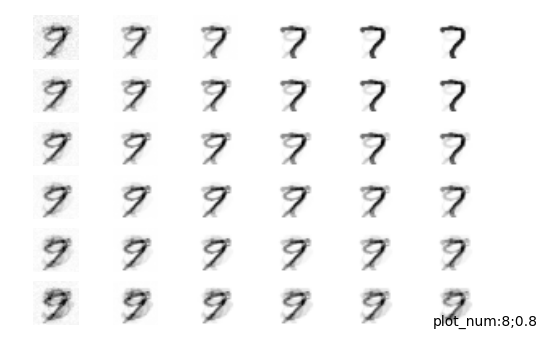

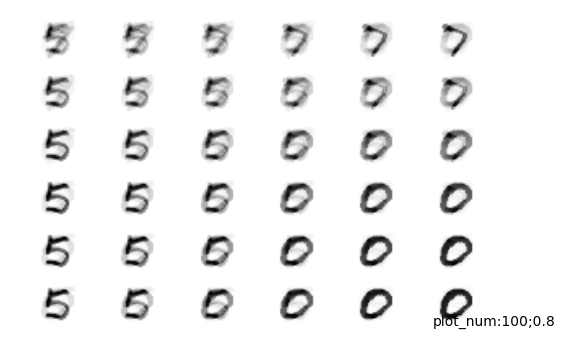

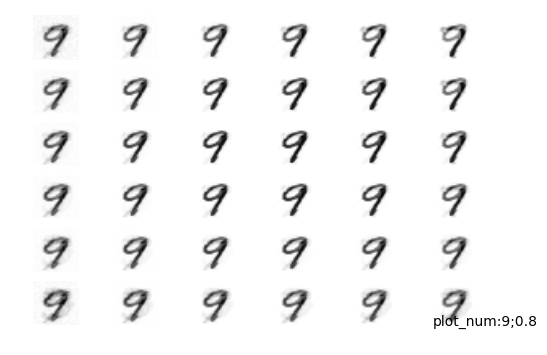

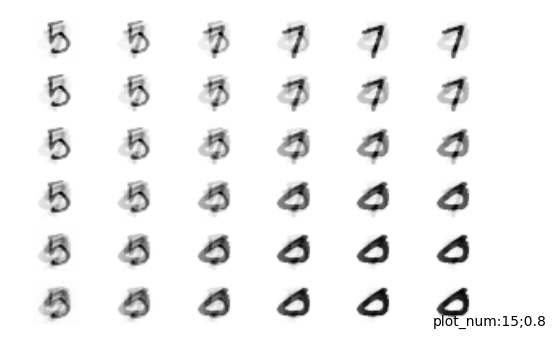

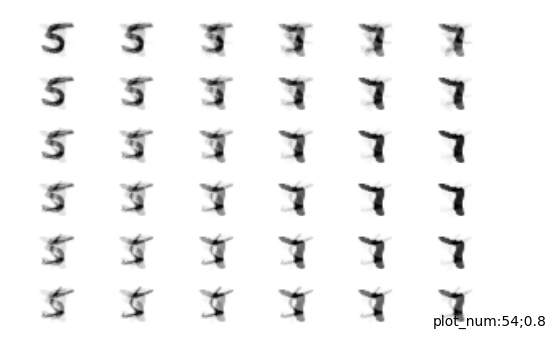

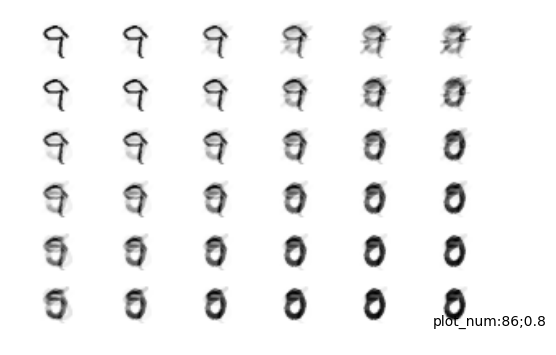

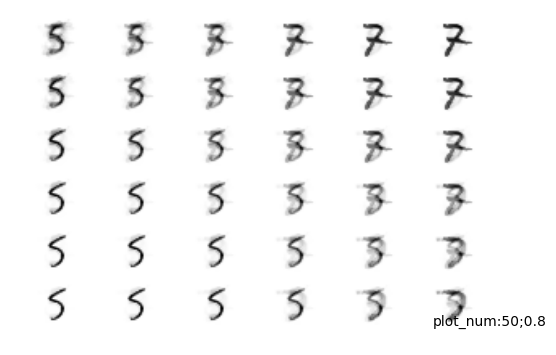

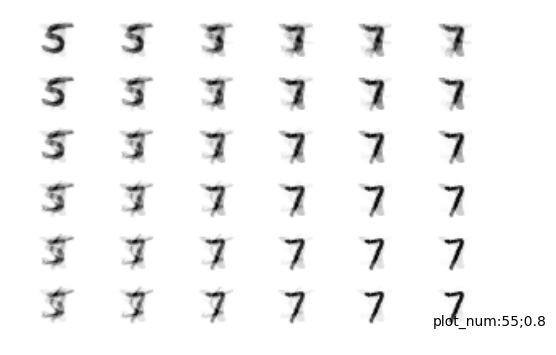

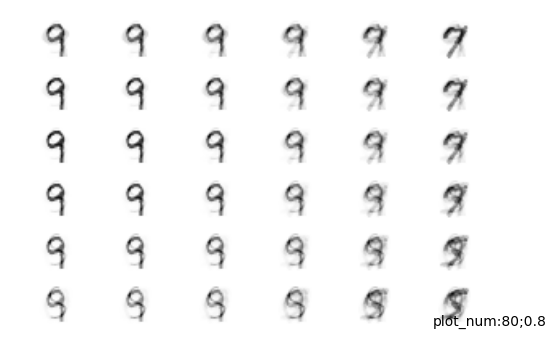

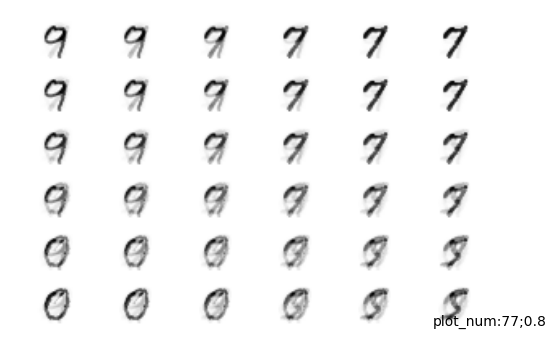

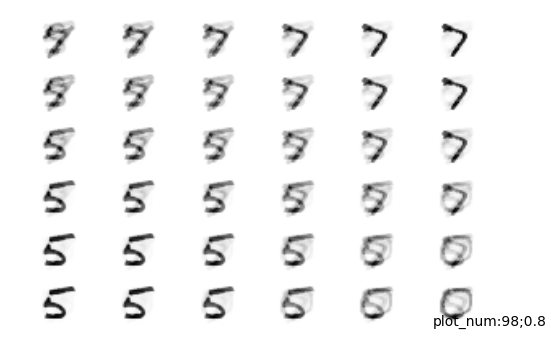

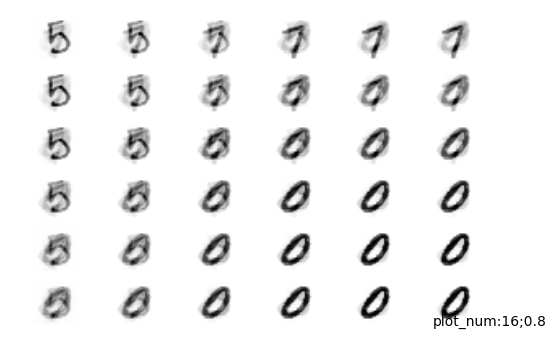

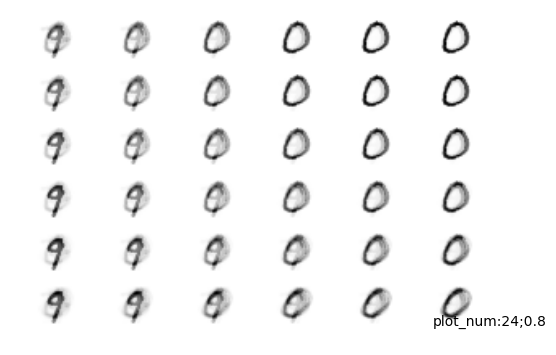

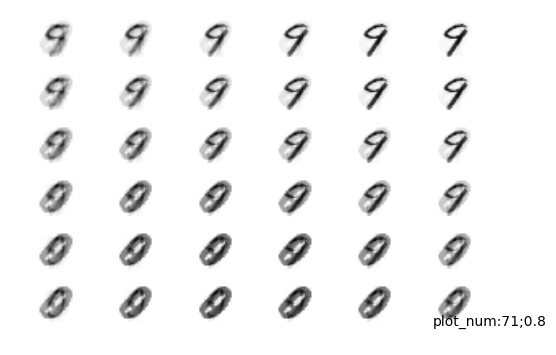

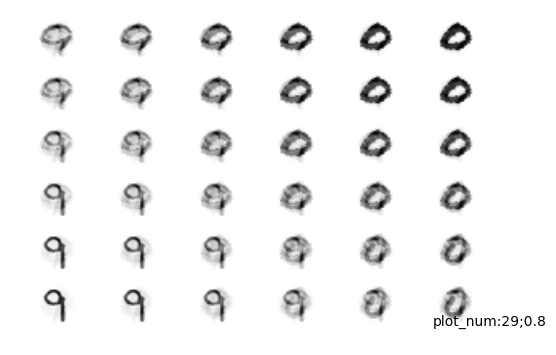

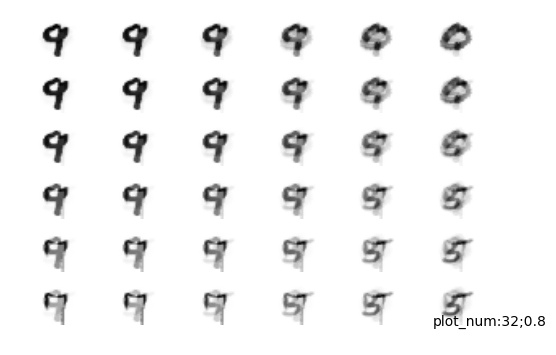

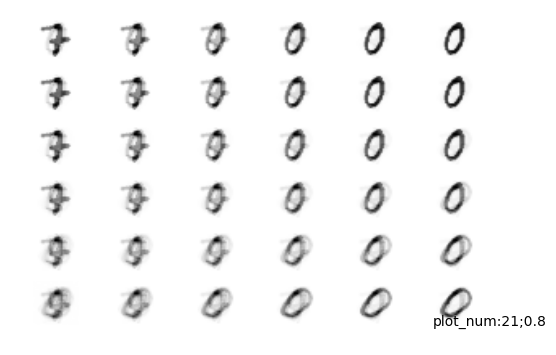

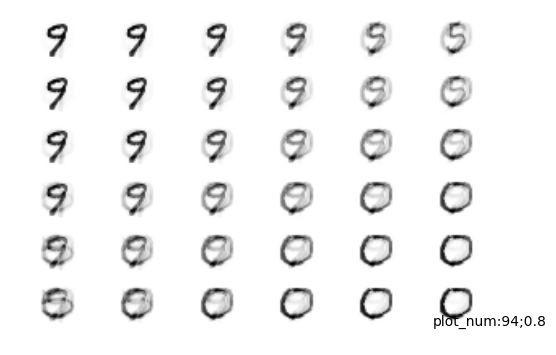

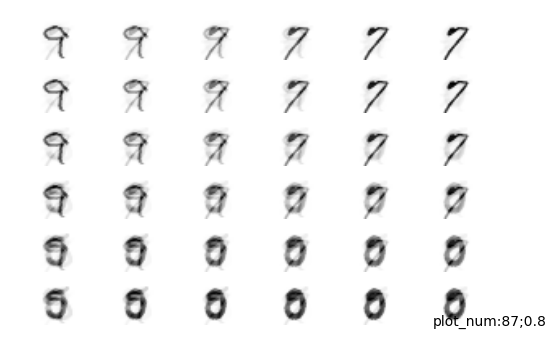

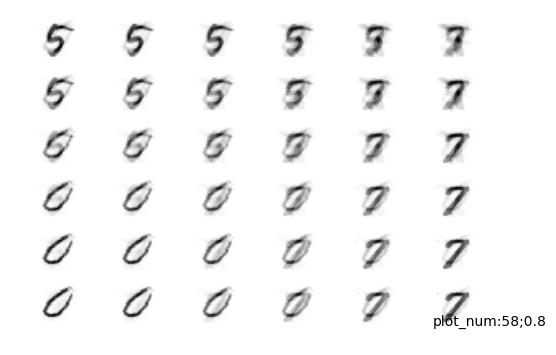

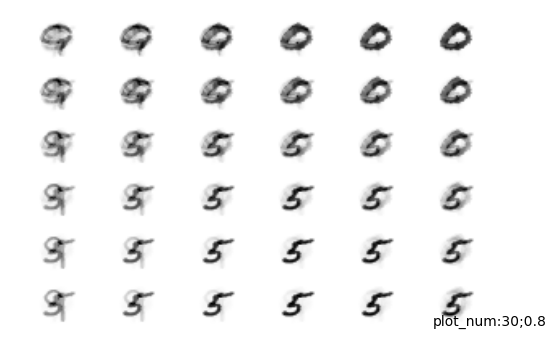

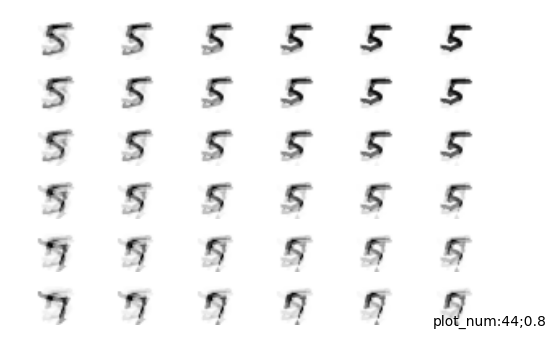

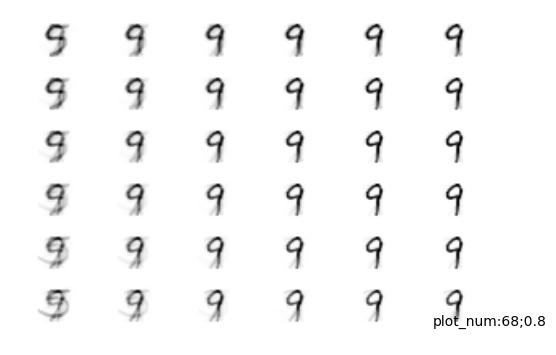

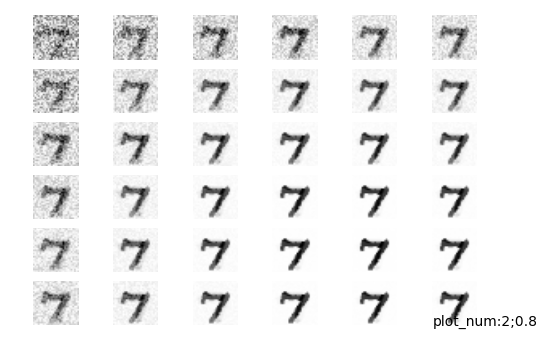

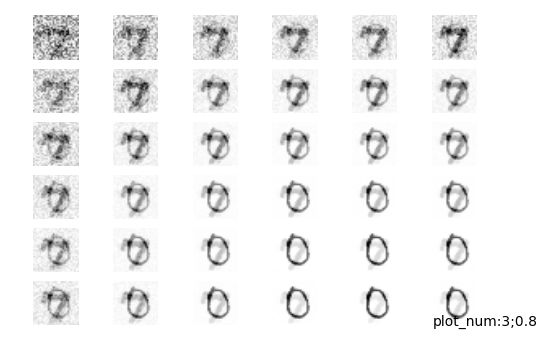

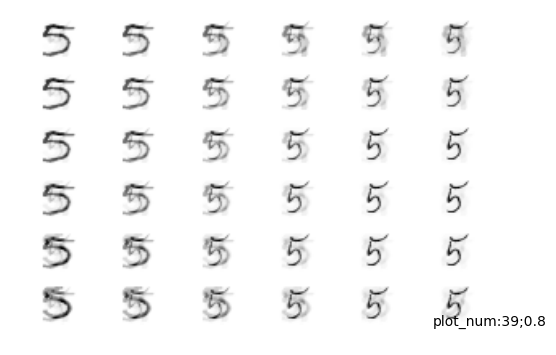

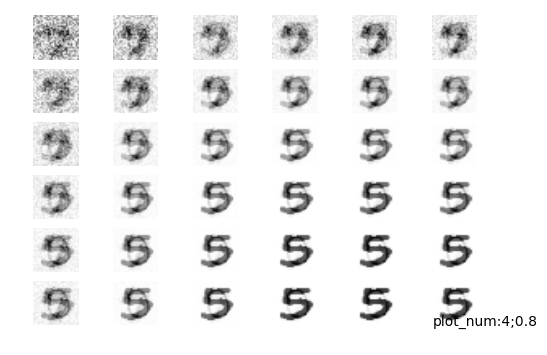

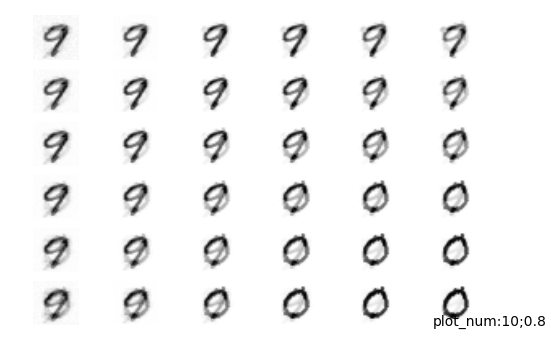

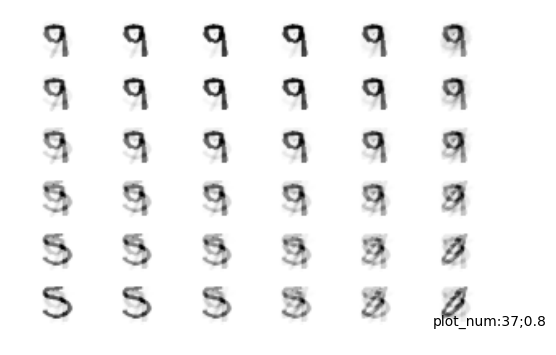

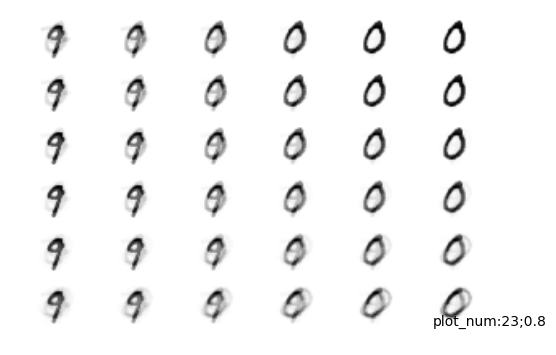

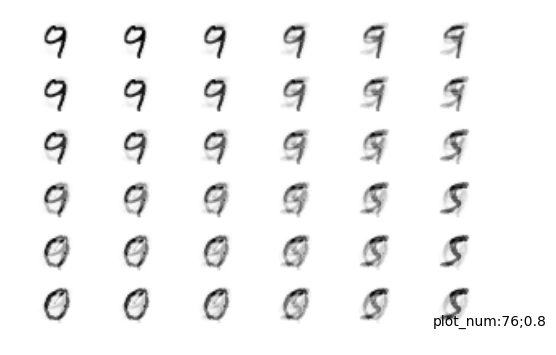

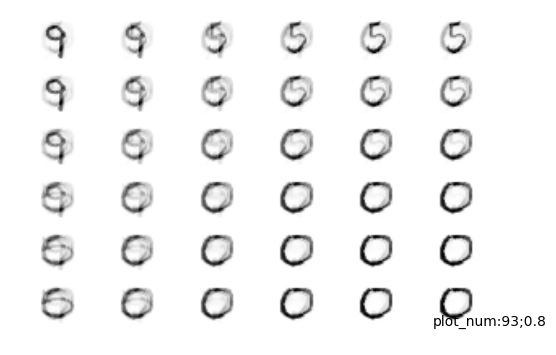

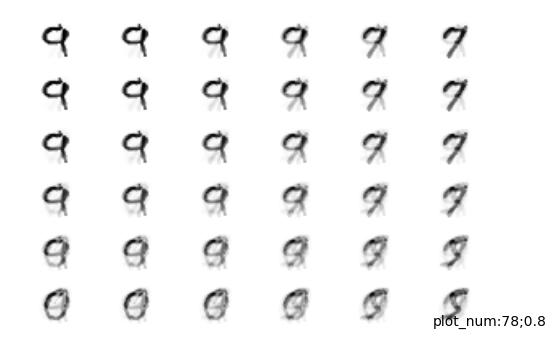

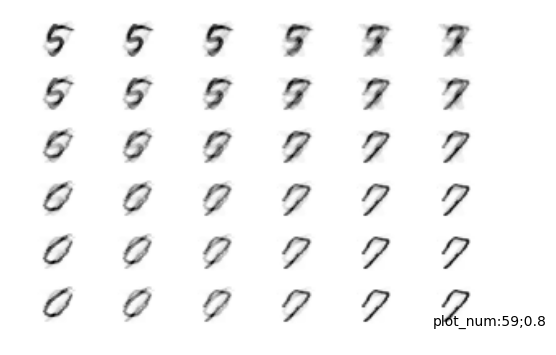

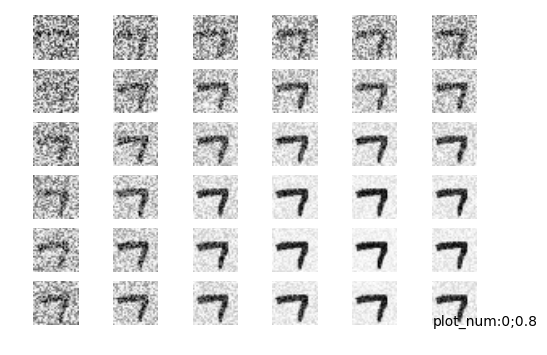

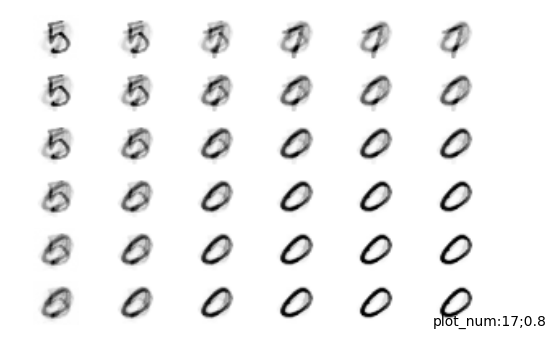

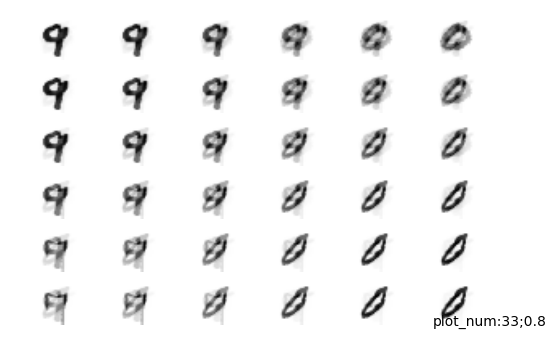

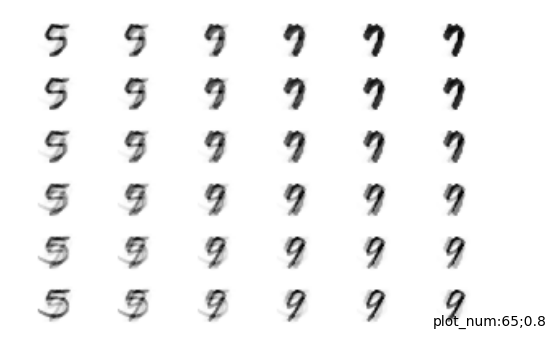

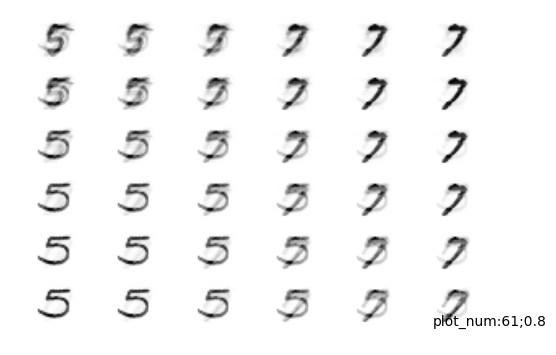

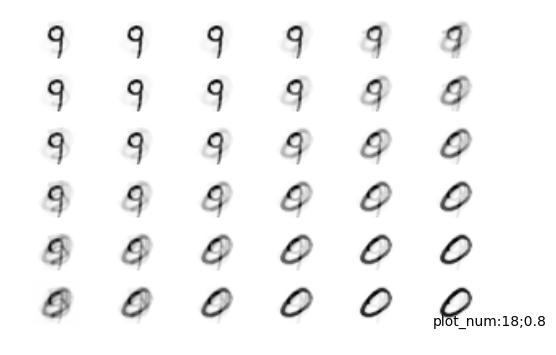

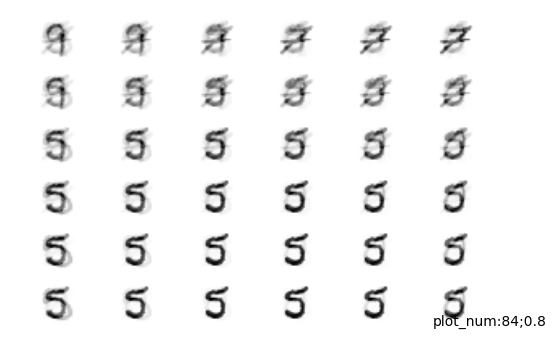

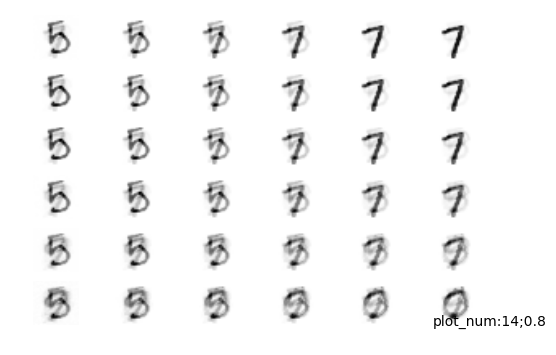

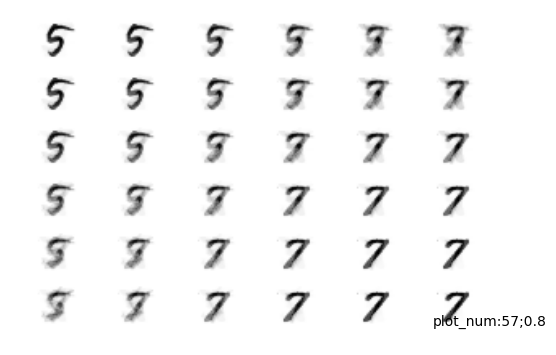

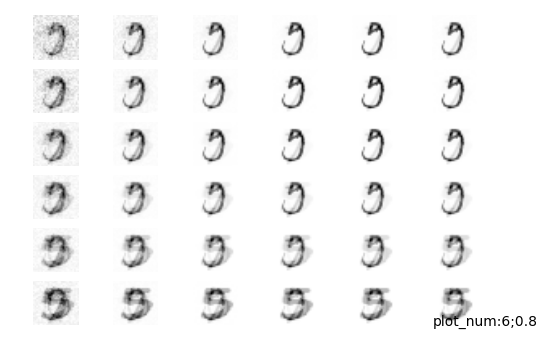

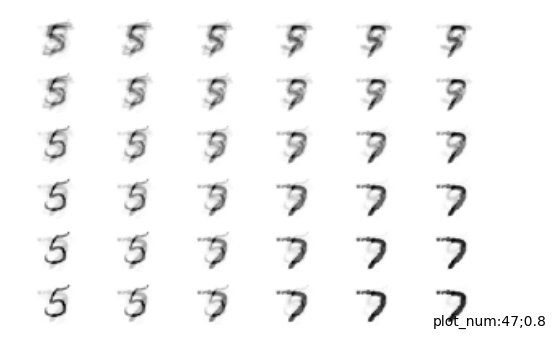

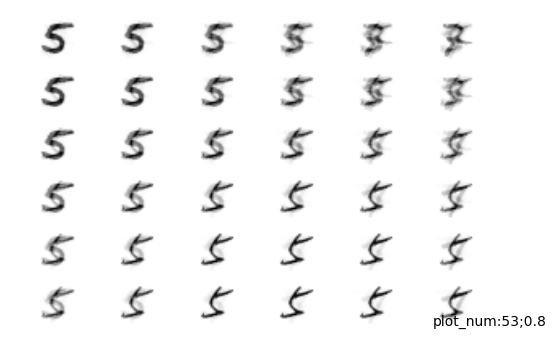

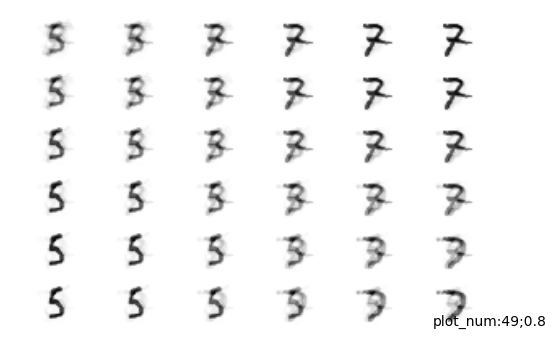

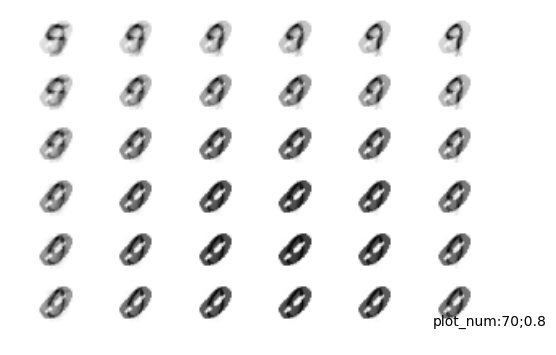

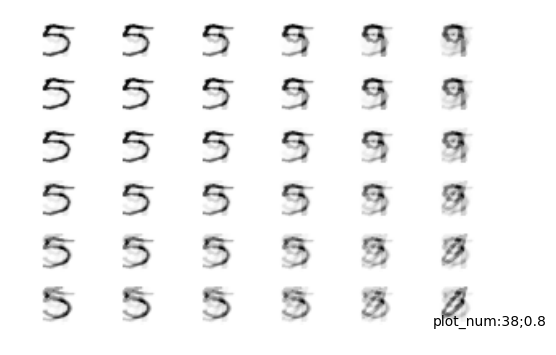

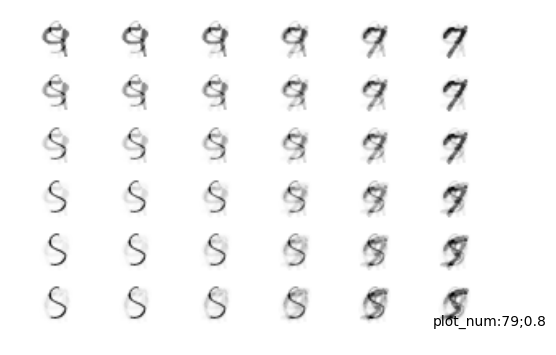

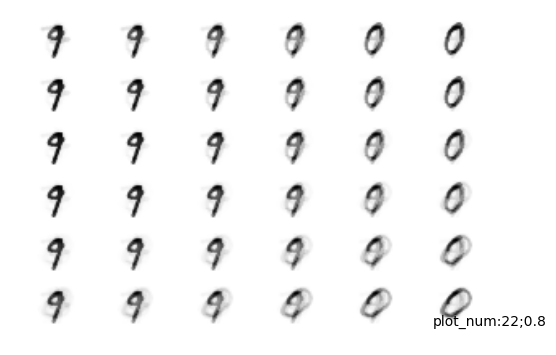

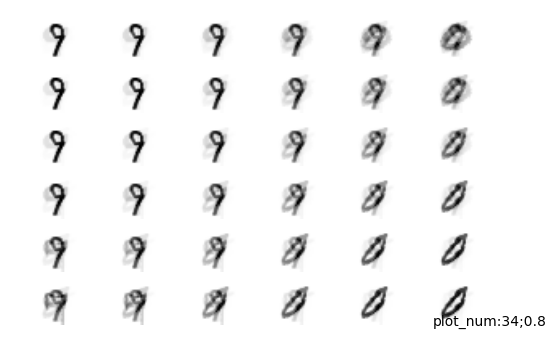

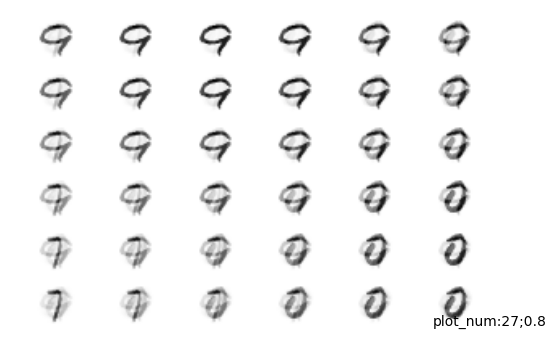

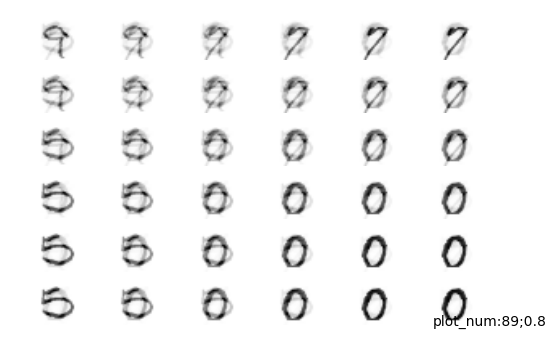

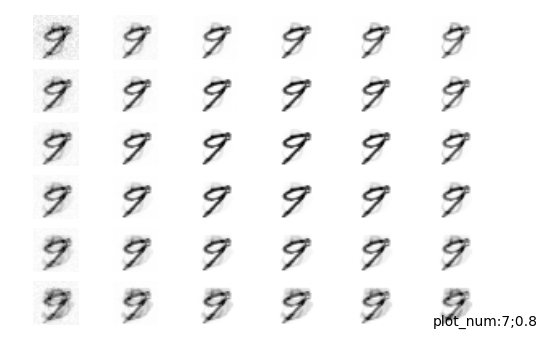

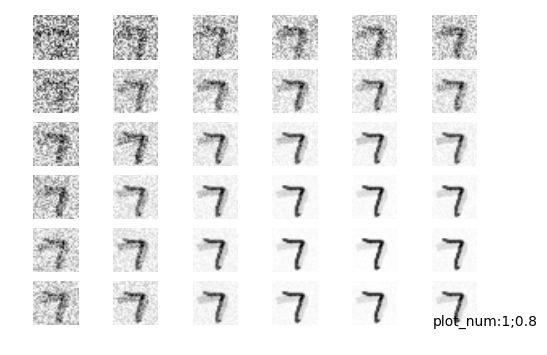

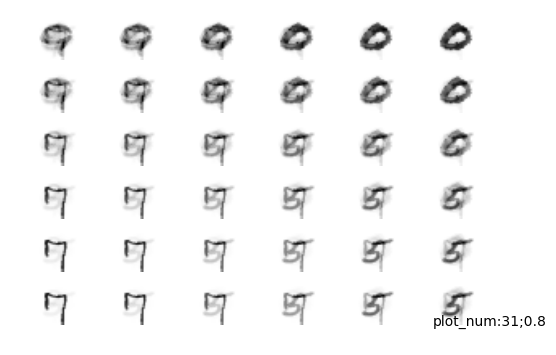

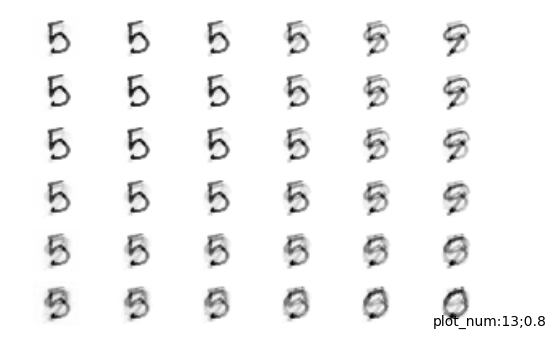

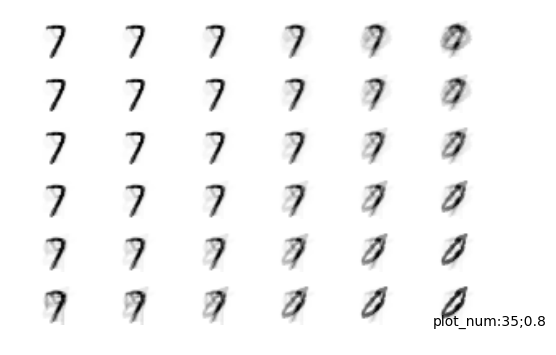

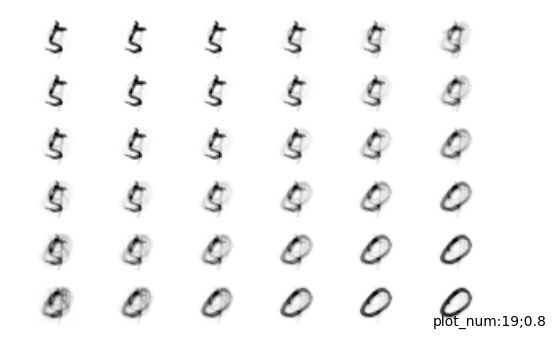

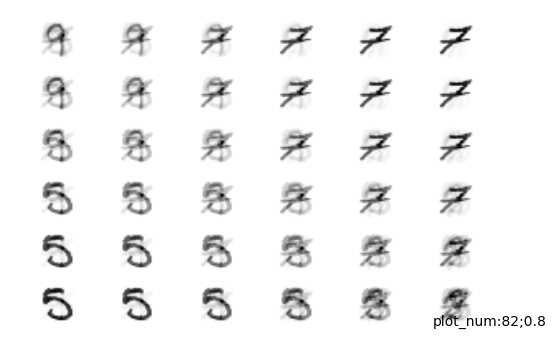

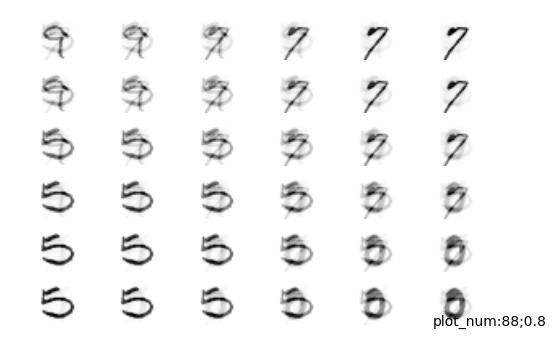

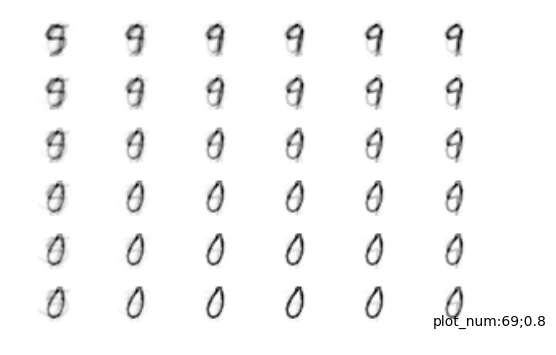

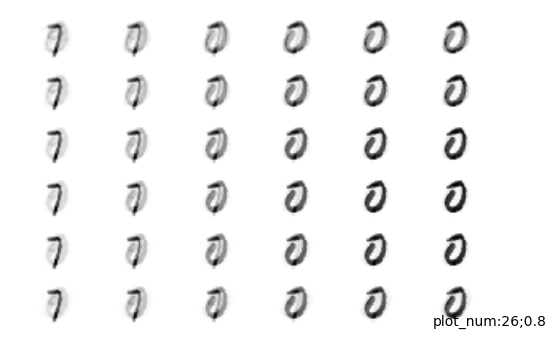

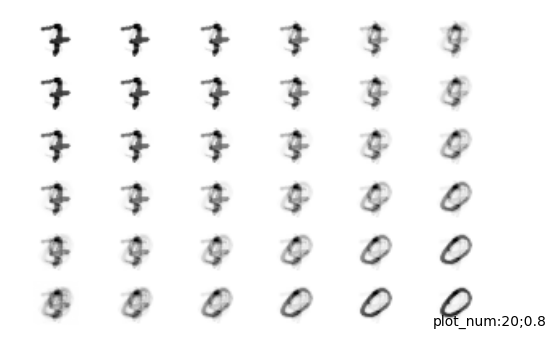

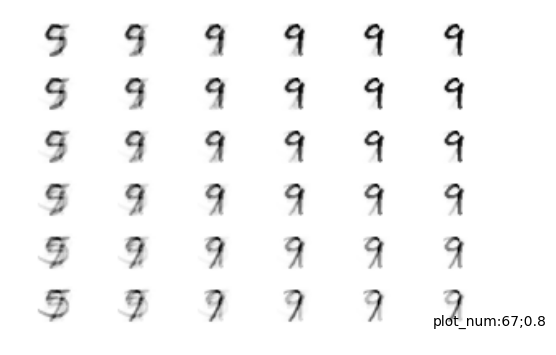

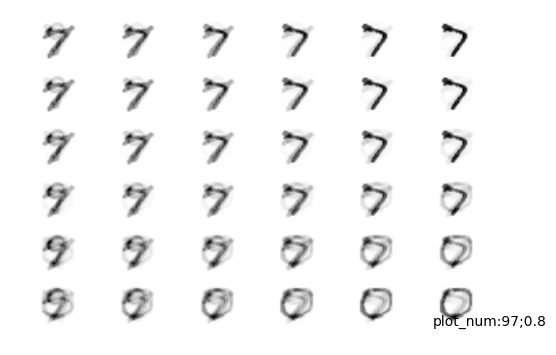

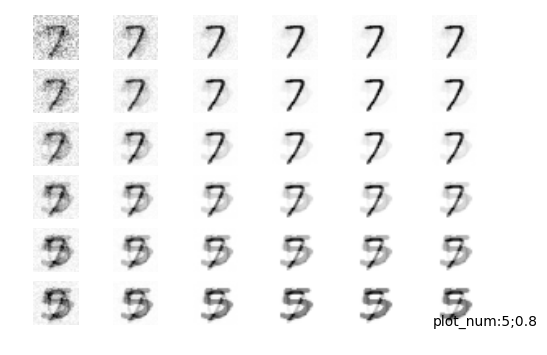

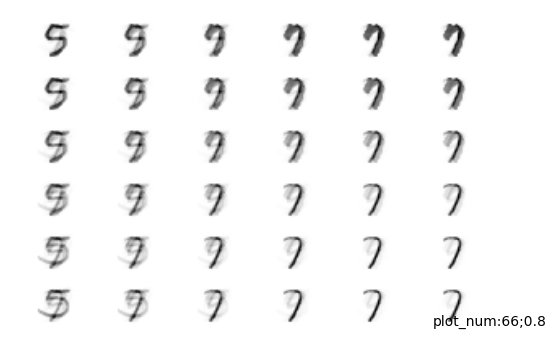

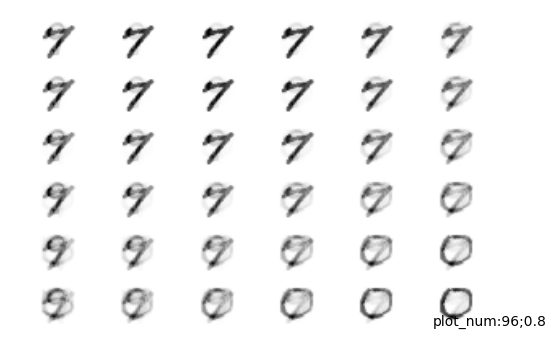

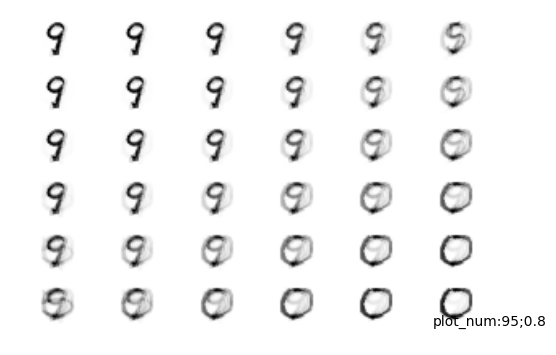

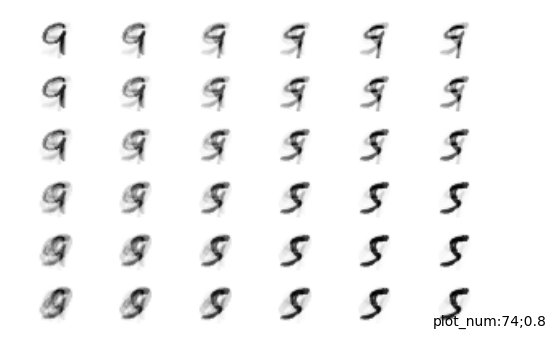

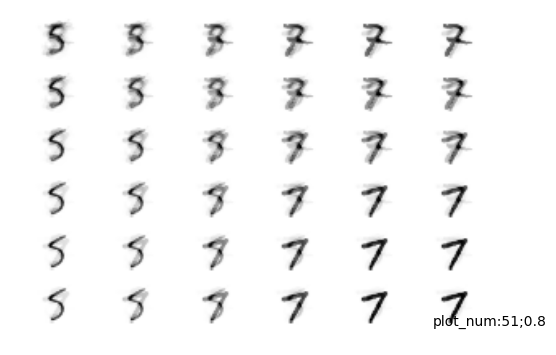

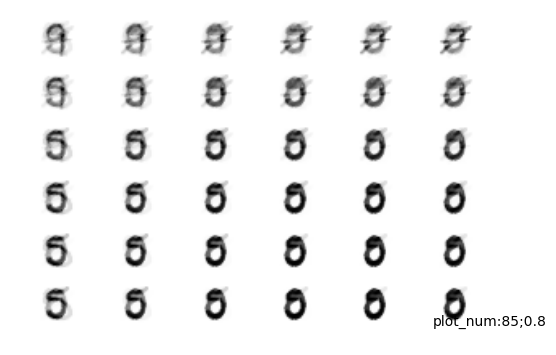

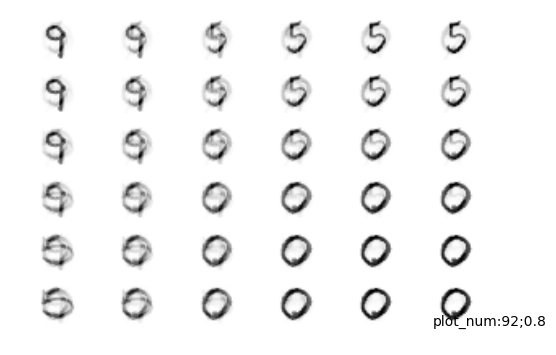

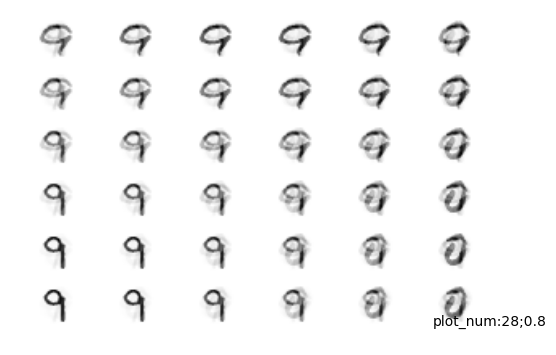

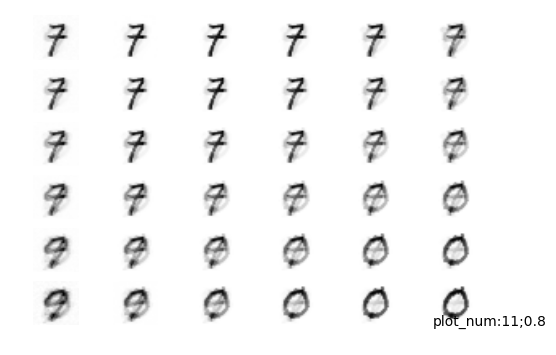

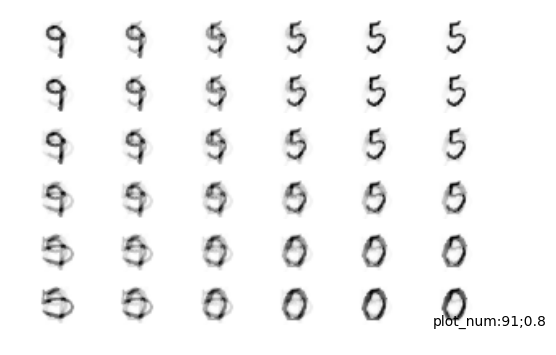

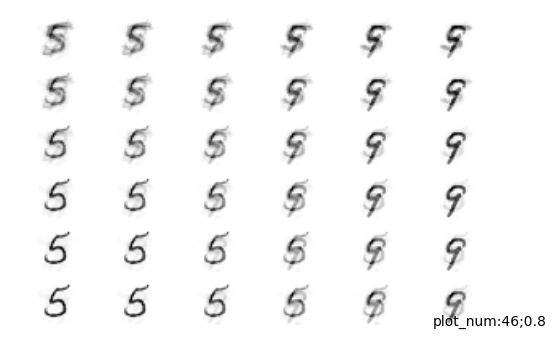

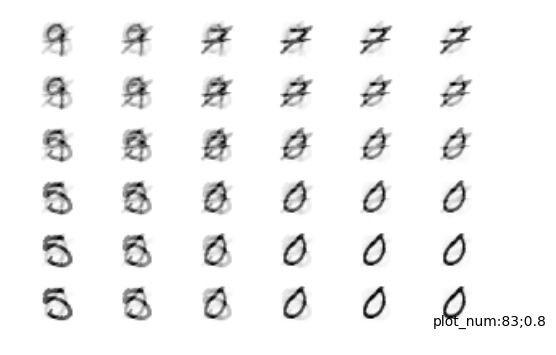

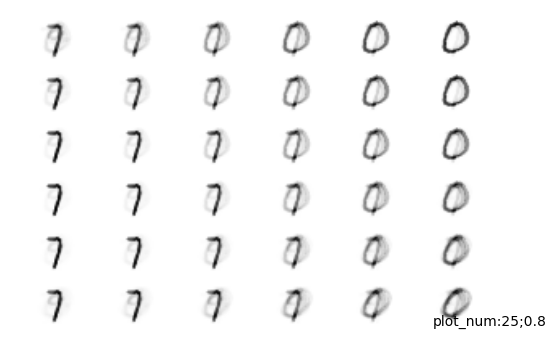

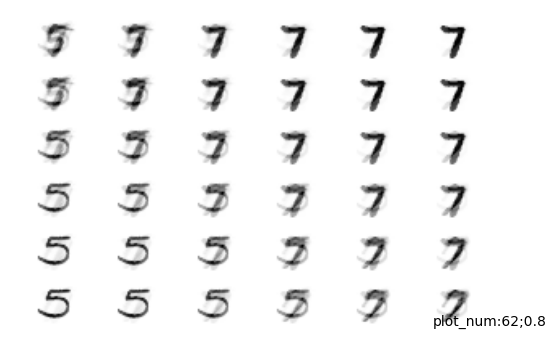

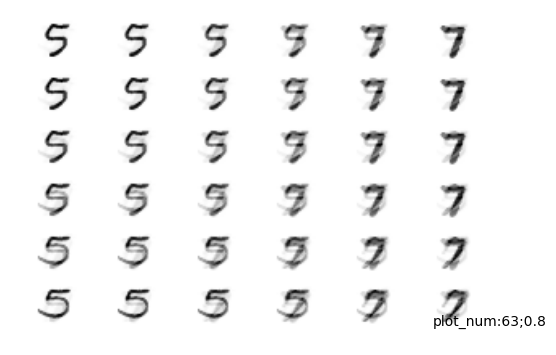

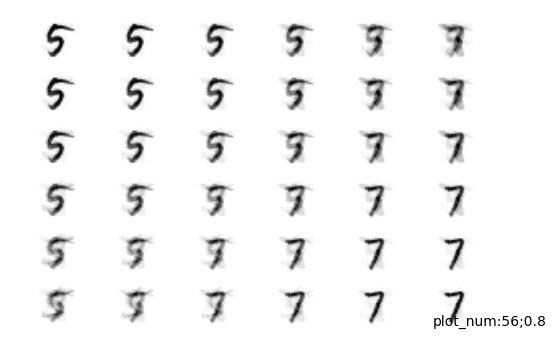

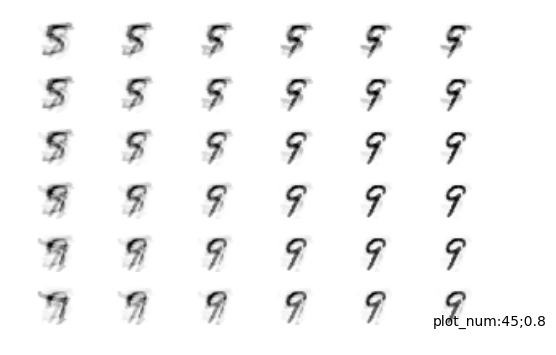

In [3]:
def kohonen(data,labels,ite_num):
    """Example for using create_data, plot_data and som_step.
    """
    plb.close('all')
    
    
    for a in range(0,np.shape(ite_num)[0]):    
        #initialise the centers randomly
        centers = np.random.rand(size_k**2, dim) * data_range
        #build a neighborhood matrix
        neighbor = np.arange(size_k**2).reshape((size_k, size_k))
        #set the random order in which the datapoints should be presented
        i_random = np.arange(tmax) % dy
        np.random.shuffle(i_random)
        plb.figure
        losses = np.zeros((tmax*np.shape(ite_num)[0],36))
        print("Iteration number is",a,". Will iterate",ite_num[a],"time on the data set here.")
        print(np.shape(ite_num))
        for j in range(0,np.shape(ite_num)[0]):
            #np.random.shuffle(i_random)
            eta = 1*ite_num[j]
            for t, i in enumerate(i_random):
                new_centers = som_step(centers, data[i,:],neighbor,eta,sigma)
                losses[i*(j+1),:] = (MSE(centers,new_centers))
                centers = new_centers
                if(t<=100):

    # for visualization, you can use this:
                    plb.figure(i)
                    
                    for i in range(0,size_k**2):
                        plb.subplot(size_k,size_k,i+1)
        
                        plb.imshow(np.reshape(centers[i,:], [28, 28]),cmap='Greys',interpolation='bilinear')
                        plb.axis('off')
                    plb.annotate("plot_num:"+str(t)+";"+str(eta),xy=(0,27))
                    plb.savefig("plots/plot"+"_eta"+str(eta)+"_num"+str(t)+".png")
                    plb.close(i)
    # leave the window open at the end of the loop
        plb.show()
        plb.draw()
               
        return losses,i_random,data

ite_nums = [0.8]
losses,i_random,newdata = kohonen(data,labels,ite_nums)

Ploting result with : 4000 iteration, i.e. 2 times 2000


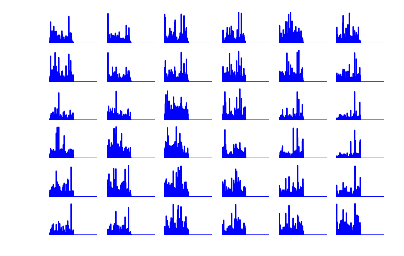

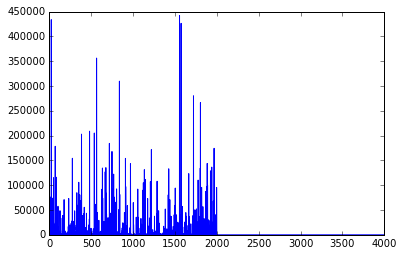

In [88]:
a = 0
print("Ploting result with :",ite_nums[a]*tmax,"iteration, i.e.",ite_nums[a],"times",tmax)
i_s = np.arange(0,tmax*ite_nums[a])
for i in range(0,size_k**2):
    plb.subplot(size_k,size_k,i+1)
    plb.plot(i_s,losses[:,i])
    plb.axis('off')

plb.figure()
plb.plot(i_s,losses[:,i])

In [80]:


print(losses[1985:2010,8])
print(losses[2000,:])

[  2.23410177e+01   4.82702370e+02   9.13795321e+03   3.46389943e-02
   3.32062223e+00   3.80914531e+03   1.37348929e+01   2.87779792e+03
   4.78304129e+00   3.78530923e+01   3.63339018e+00   1.39167624e+01
   5.51086351e+04   4.44736806e+01   3.58903267e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
